In [1]:
%run ./resources/library.py
style_notebook()

# Notebook 6: Using SciPy-Spatial to create a Voronoi overlay on Soho District, London (Work-in-Progress)

**SciPy** (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering (from SciPy [website](https://www.scipy.org/)). 

These are some of the core packages in SciPy (ones we have used are in <font color='red'>red</font>):
1. <font color='red'>Numpy</font>
2. SciPy Library
3. <font color='red'>Matplotlib</font>
4. <font color='red'>IPython</font>
5. Sympy
6. <font color='red'>Pandas</font>

[SciPy Spatial](https://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial), from the SciPy package consists of spatial algorithms and data structures.

## Voronoi Diagrams

From Wikipedia: "In mathematics, a <font color='red'>Voronoi diagram</font> is a __partitioning__ of a plane into regions based on distance to points in a specific subset of the plane. That set of points (called seeds, sites, or generators) is specified beforehand, and for each seed there is a corresponding region consisting of all points closer to that seed than to any other. These regions are called Voronoi cells."

In outbreak investigations, Voronoi diagrams can be used to identify and correlate potential sources of infections.

In [2]:
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pumps_df = pd.read_pickle('outputs/pumps_df.pickle')
deaths_df = pd.read_pickle('outputs/mean_center_df.pickle')

In [4]:
pumps_df

,FID,LON,LAT
0,250,-0.136668,51.513341
1,251,-0.139586,51.513876
2,252,-0.139671,51.514906
3,253,-0.131630,51.512354
4,254,-0.133594,51.512139
5,255,-0.135919,51.511542
6,256,-0.133962,51.510019
7,257,-0.138199,51.511295


In [5]:
pump_points = pumps_df[['LAT', 'LON']].values

In [6]:
pump_points

array([[51.513341, -0.136668],
       [51.513876, -0.139586],
       [51.514906, -0.139671],
       [51.512354, -0.13163 ],
       [51.512139, -0.133594],
       [51.511542, -0.135919],
       [51.510019, -0.133962],
       [51.511295, -0.138199]])

In [7]:
death_points = deaths_df[['LAT','LON']].values

In [8]:
death_points[0]

array([51.513418, -0.13793 ])

In [9]:
pump_vor = Voronoi(pump_points)

In [10]:
pump_vor.vertices

array([[51.52725397, -0.13132661],
       [51.51085006, -0.13245913],
       [51.51766511, -0.13320518],
       [51.5084689 , -0.13673946],
       [51.51209239, -0.13713201],
       [51.51122125, -0.13459749],
       [51.51296157, -0.13504436],
       [51.51452884, -0.13795826],
       [51.51293002, -0.1382514 ]])

In [11]:
pump_vor.regions

[[2, 0, -1, 1],
 [6, 4, 3, 5],
 [5, 1, -1, 3],
 [6, 2, 1, 5],
 [-1, 8, 7],
 [8, 4, 6, 2, 0, 7],
 [-1, 0, 7],
 [-1, 3, 4, 8],
 []]

## Draw the Voronoi cells and overlay death points

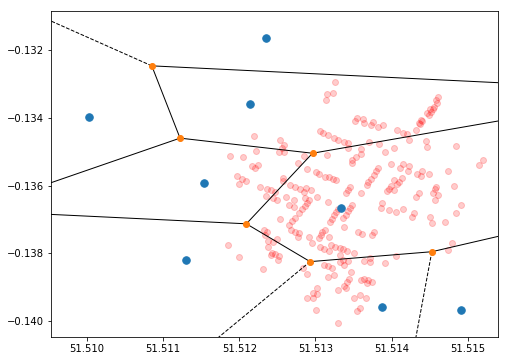

In [12]:
plt.rcParams["figure.figsize"] = [8,6]
fig = voronoi_plot_2d(pump_vor, point_size=15)
plt.scatter(deaths_df['LAT'], deaths_df['LON'], c='r', alpha=0.2)
plt.show()

## References

1. SciPy Spatial Voronoi web page. URL: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html#scipy.spatial.Voronoi
2. https://ipython-books.github.io/145-computing-the-voronoi-diagram-of-a-set-of-points/
3. http://comet.lehman.cuny.edu/owen/teaching/datasci/makeVor.py
4. https://python-visualization.github.io/folium/quickstart.html

*For case study suggestions for improvement, please contact Herman Tolentino, Jan MacGregor, James Tobias or Zhanar Haimovich.*